### Seaborn
- http://seaborn.pydata.org/
- Seaborn은 matplotlib을 기반으로하는 Python 시각화 라이브러리로 고급인터페이스를 제공하기 위한 패키지
```
$ pip3 install seaborn
```

In [1]:
!pip3 install seaborn

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

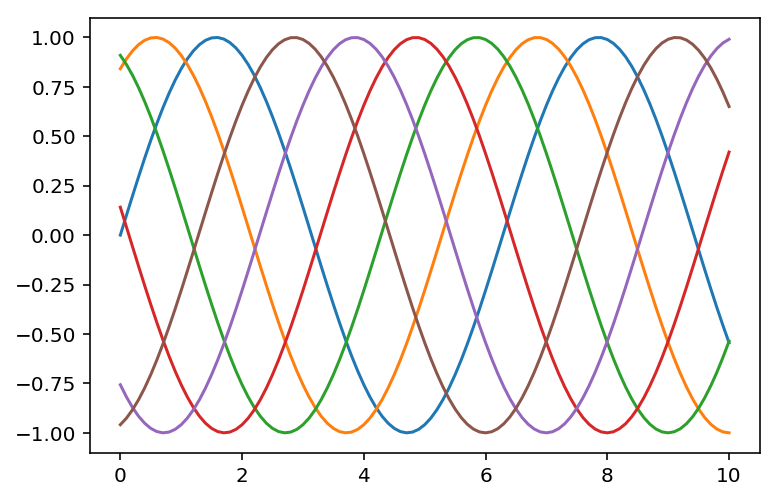

In [4]:
def sinplot():
    x = np.linspace(0, 10, 101) # 0-10 101 등분
    for i in range(6):
        plt.plot(x, np.sin(i + x)) # 60도씩 sin이 이동된 데이터를 그려줌
sinplot()

##### set

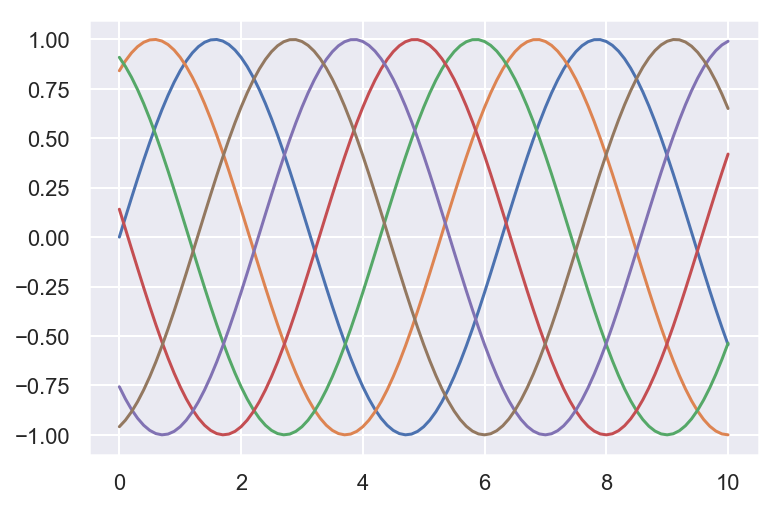

In [5]:
# set seaborn
sns.set()
sinplot()

##### set style

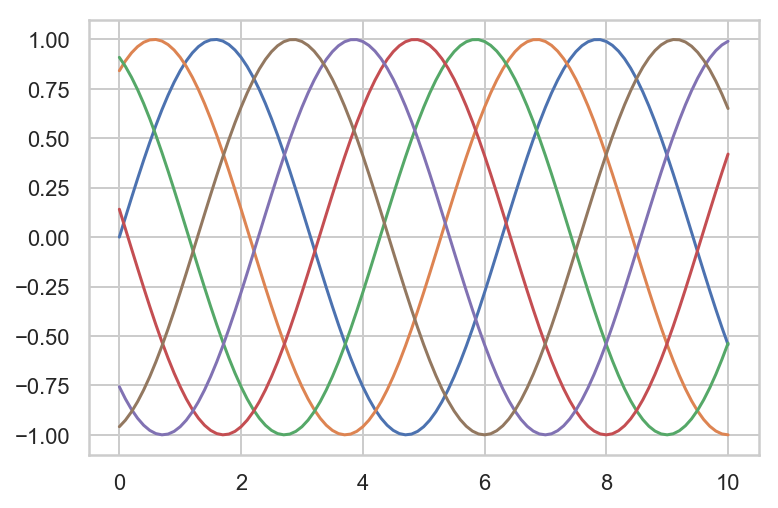

In [6]:
# set whitegrid style
sns.set_style('whitegrid')
sinplot()

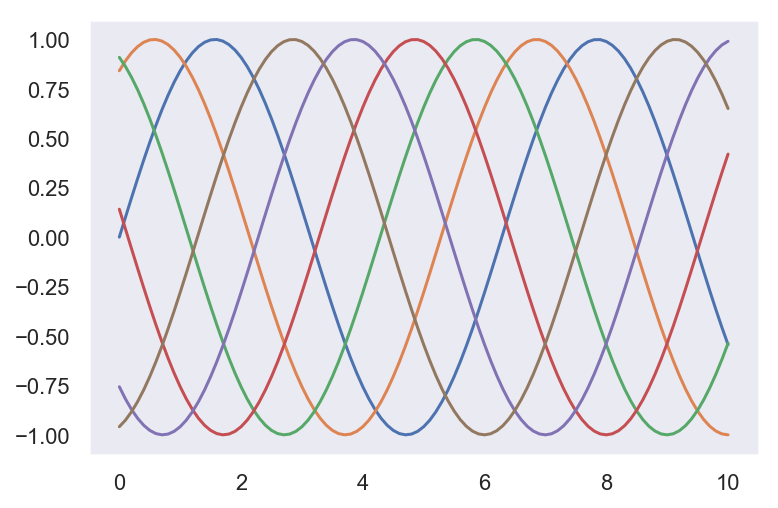

In [7]:
sns.set_style('dark')
sinplot()

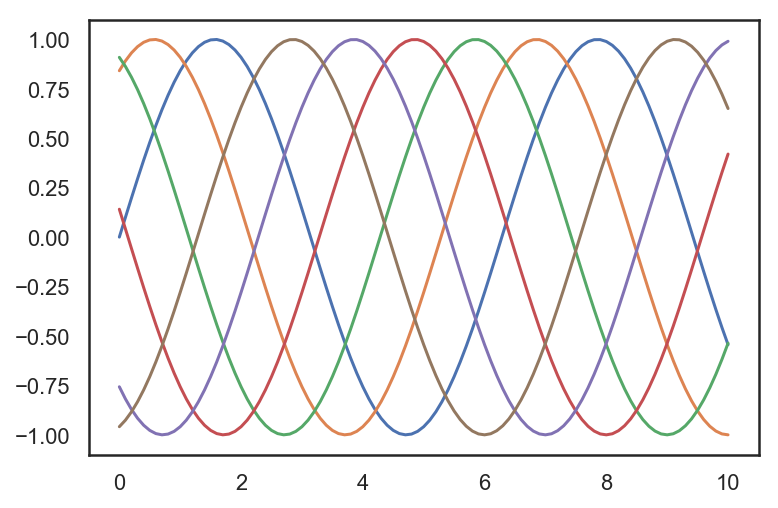

In [8]:
# set white style
sns.set_style('white')
sinplot()

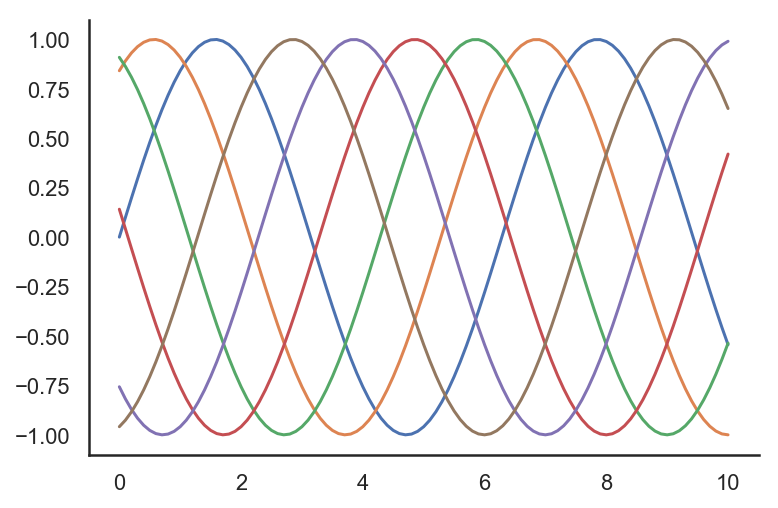

In [9]:
# remove axes spines
sinplot()
sns.despine() # 테두리선 삭제

##### set context
- 그래프의 context를 설정 (두께가 다름)
- paper
- notebook
- talk

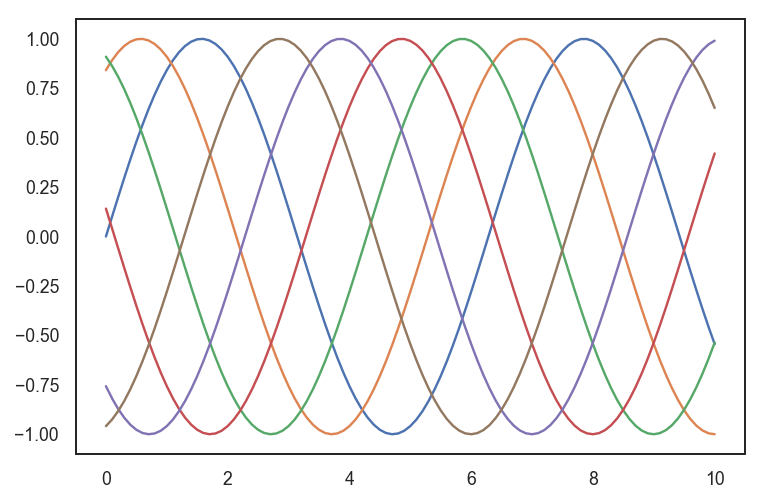

In [10]:
sns.set_context("paper")
sinplot()

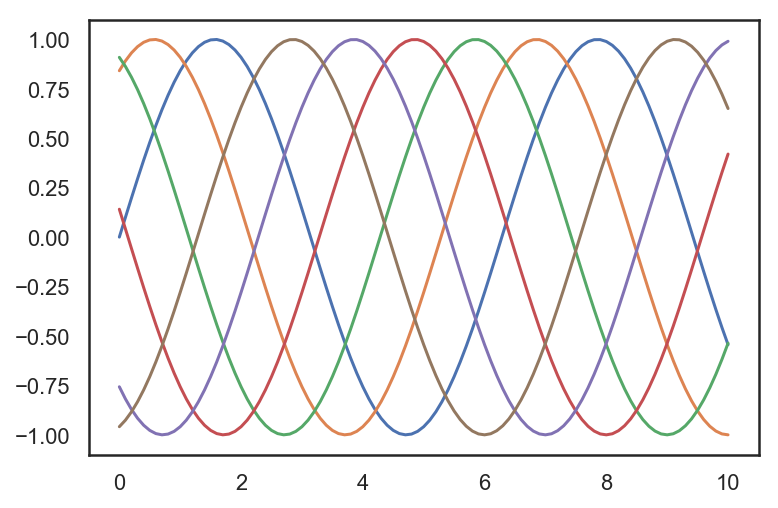

In [11]:
sns.set_context("notebook")
sinplot()

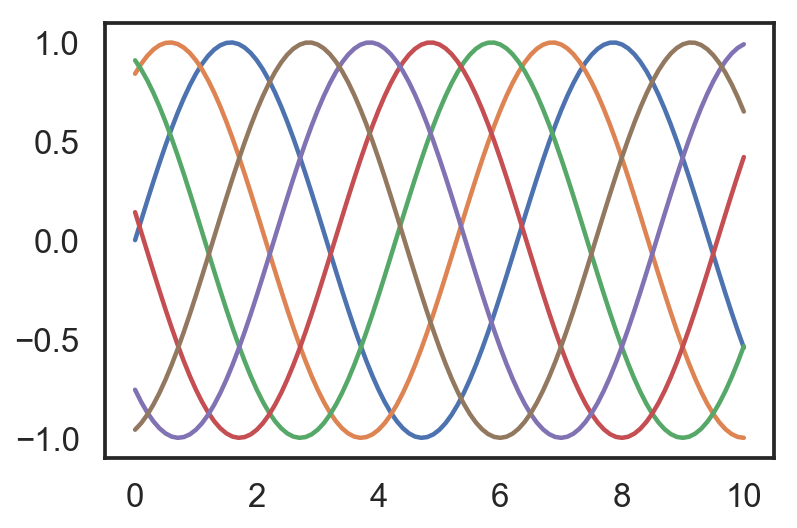

In [12]:
sns.set_context("talk")
sinplot()

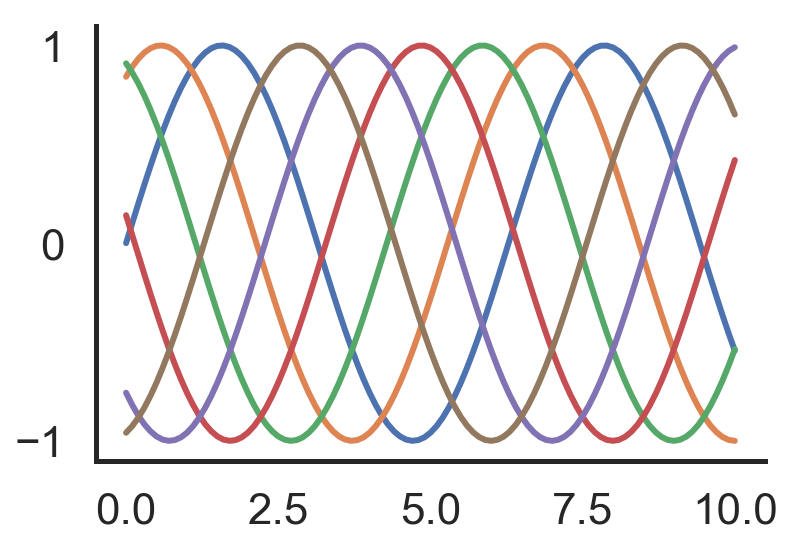

In [13]:
sns.set_context("poster")
sinplot()
sns.despine()

##### color palettes
- http://seaborn.pydata.org/tutorial/color_palettes.html

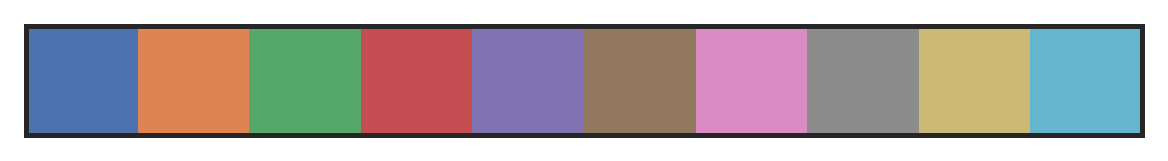

In [14]:
# check current palette
current_palette = sns.color_palette()
sns.palplot(current_palette)

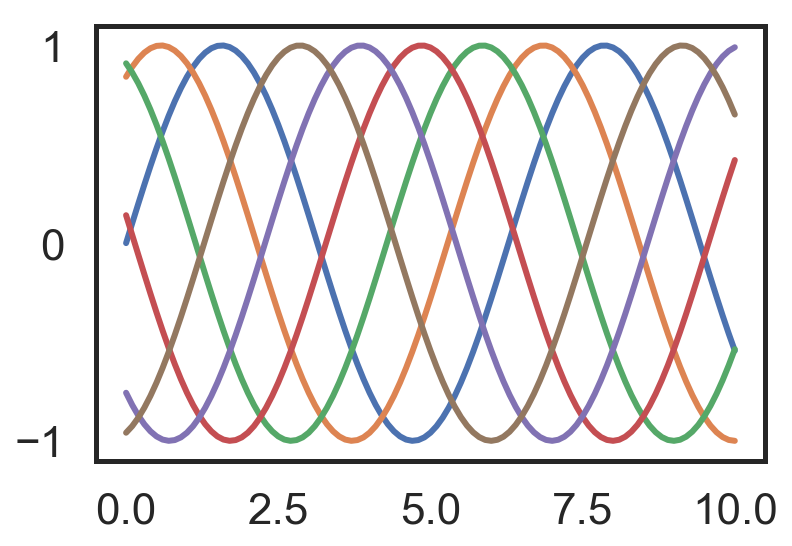

In [15]:
sinplot()

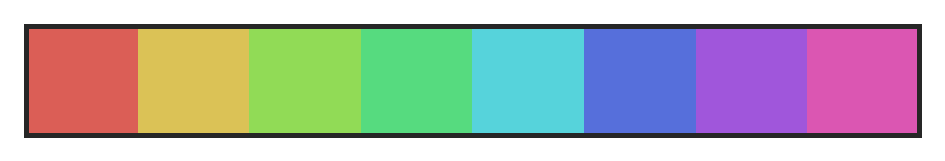

In [16]:
# change palette
palette = sns.color_palette("hls", 8)  # (팔레트명, 색상갯수)
sns.palplot(palette)
sns.set_palette("hls", 8)

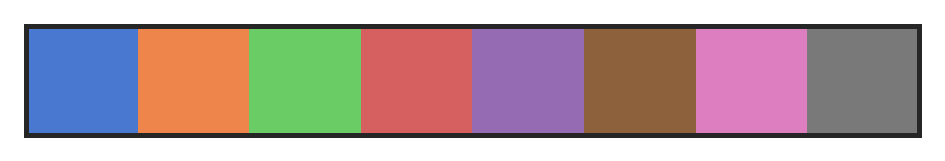

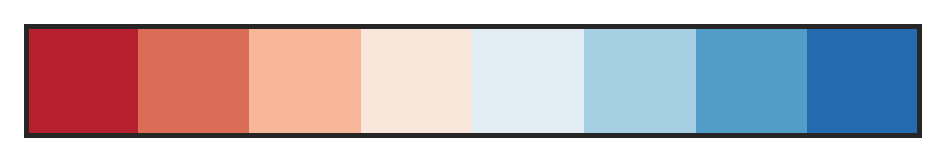

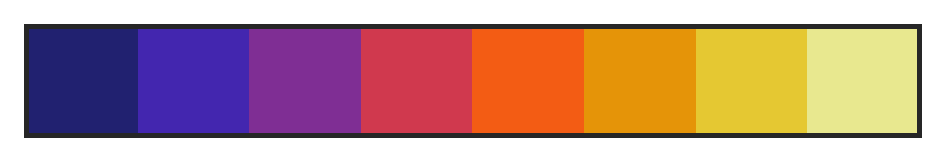

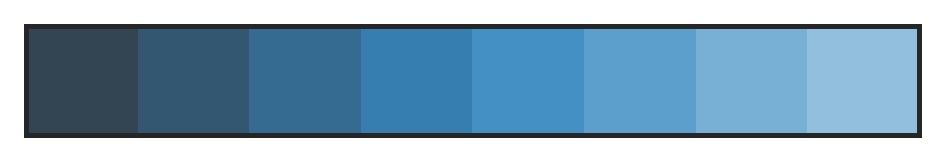

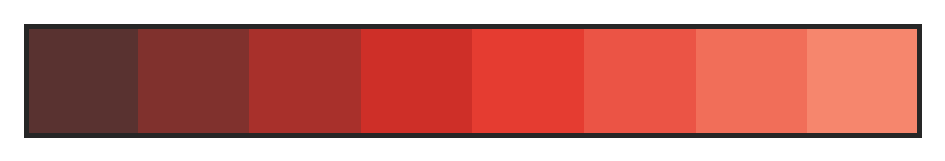

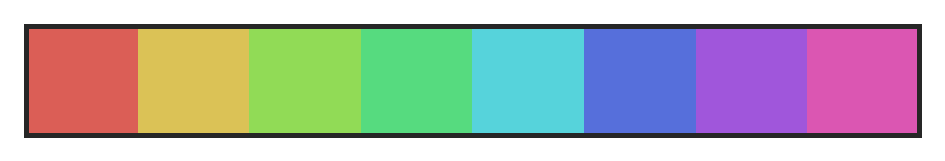

In [17]:
# colors는 에러를 내보면 사용가능한 리스트를 볼수 있다.
colors = ["muted", "RdBu", "CMRmap","Blues_d", "Reds_d", "hls"]
for color in colors:
    palette = sns.color_palette(color, 8)
    sns.palplot(palette)
    sns.set_palette(color, 8)

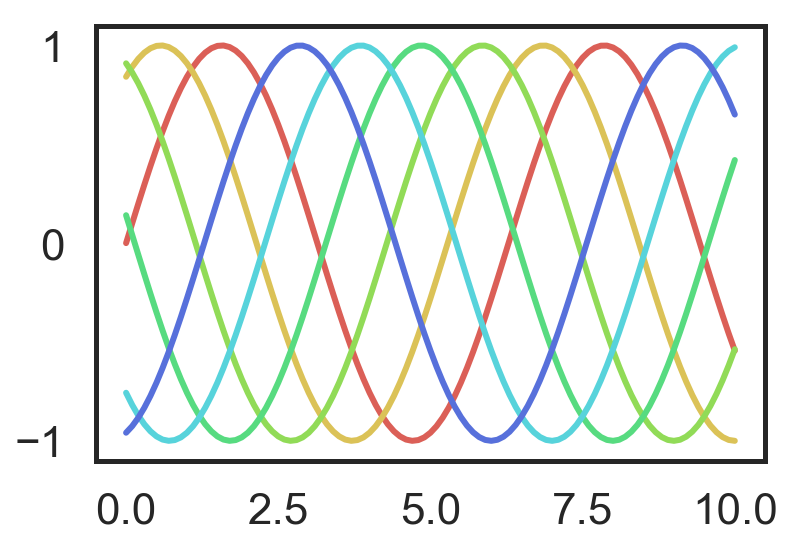

In [18]:
sinplot()

##### Sample Data
- https://github.com/mwaskom/seaborn-data

In [19]:
iris = sns.load_dataset("iris")   # 붓꽃 데이터
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [20]:
sns.set_style('whitegrid')
sns.set_context("notebook")
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

##### histogram
- https://seaborn.pydata.org/tutorial/distributions.html

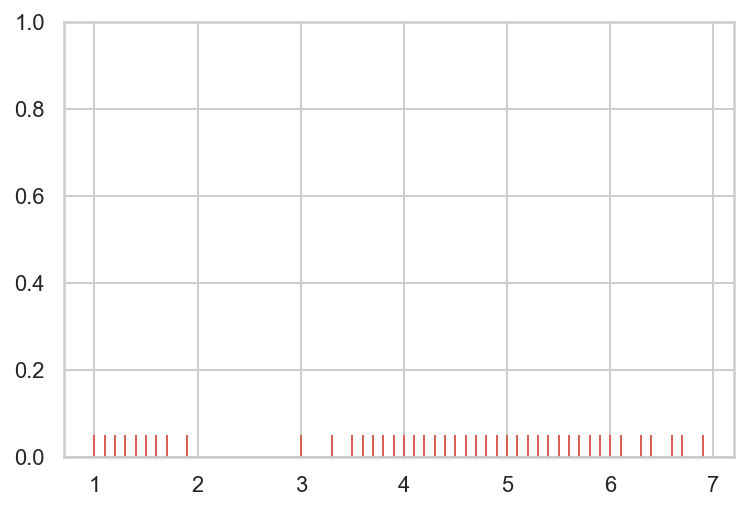

In [21]:
sns.rugplot(iris.petal_length.values)

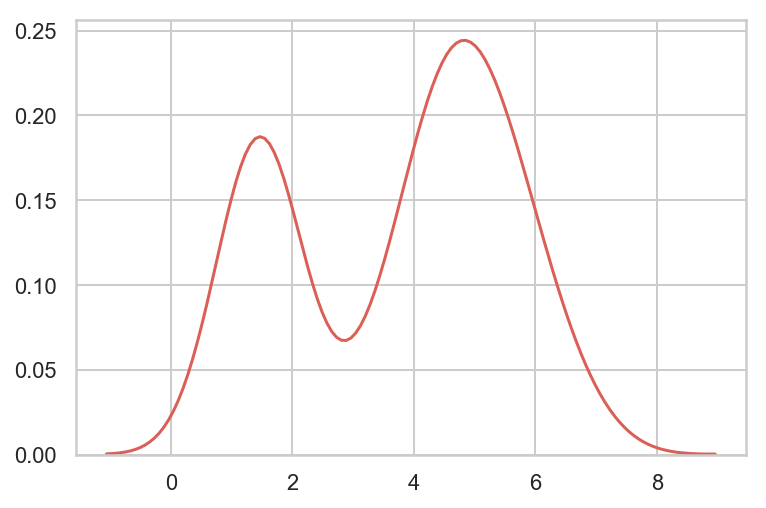

In [22]:
sns.kdeplot(iris.petal_length.values)

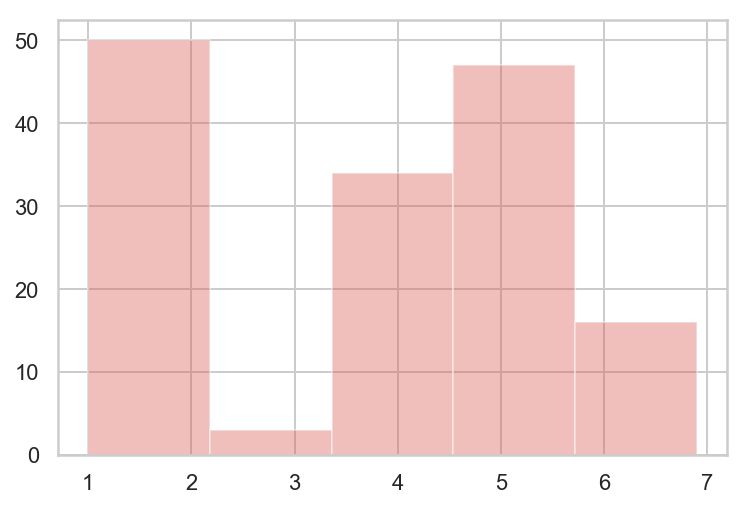

In [23]:
sns.distplot(iris.petal_length.values, kde=False)

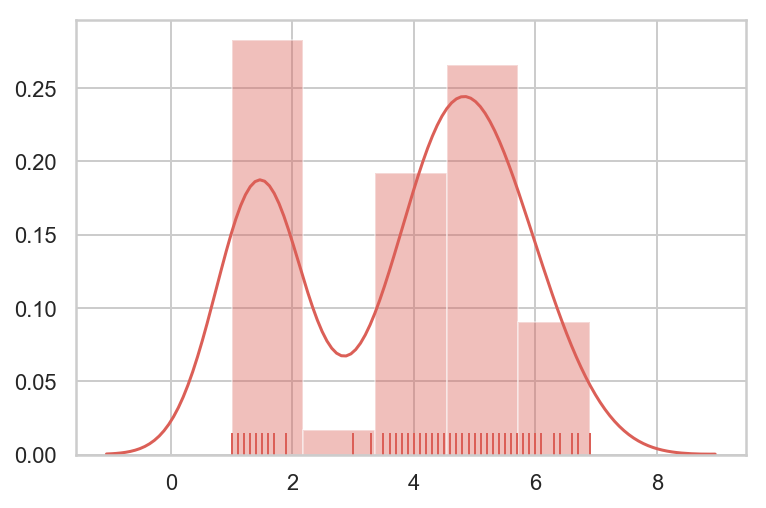

In [24]:
sns.distplot(iris.petal_length.values, kde=True, rug=True) 

##### jointplot
- https://seaborn.pydata.org/generated/seaborn.jointplot.html
- 많이 쓰임

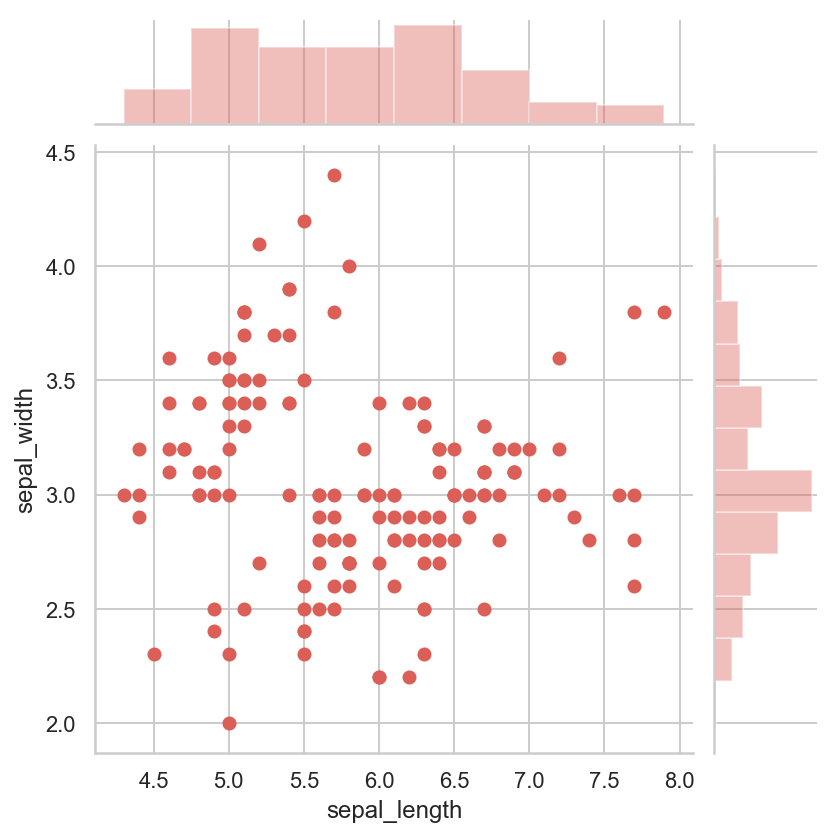

In [25]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)

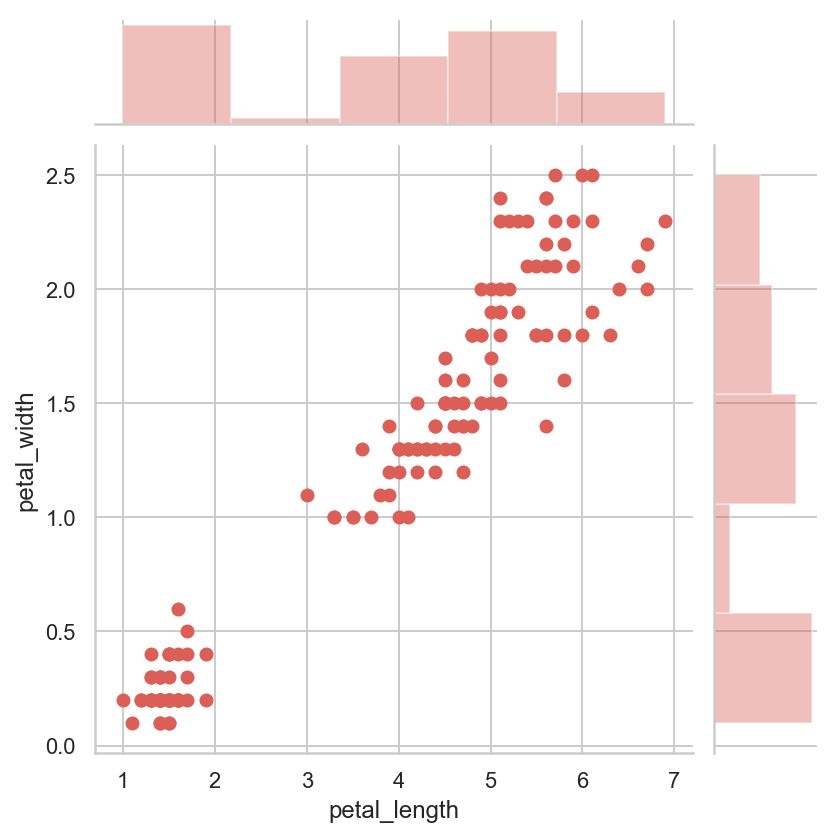

In [26]:
sns.jointplot(x="petal_length", y="petal_width", data=iris)  # pearsonr 상관계수(1에 가까울수록 관계있음)

##### pairplot
- http://seaborn.pydata.org/generated/seaborn.pairplot.html

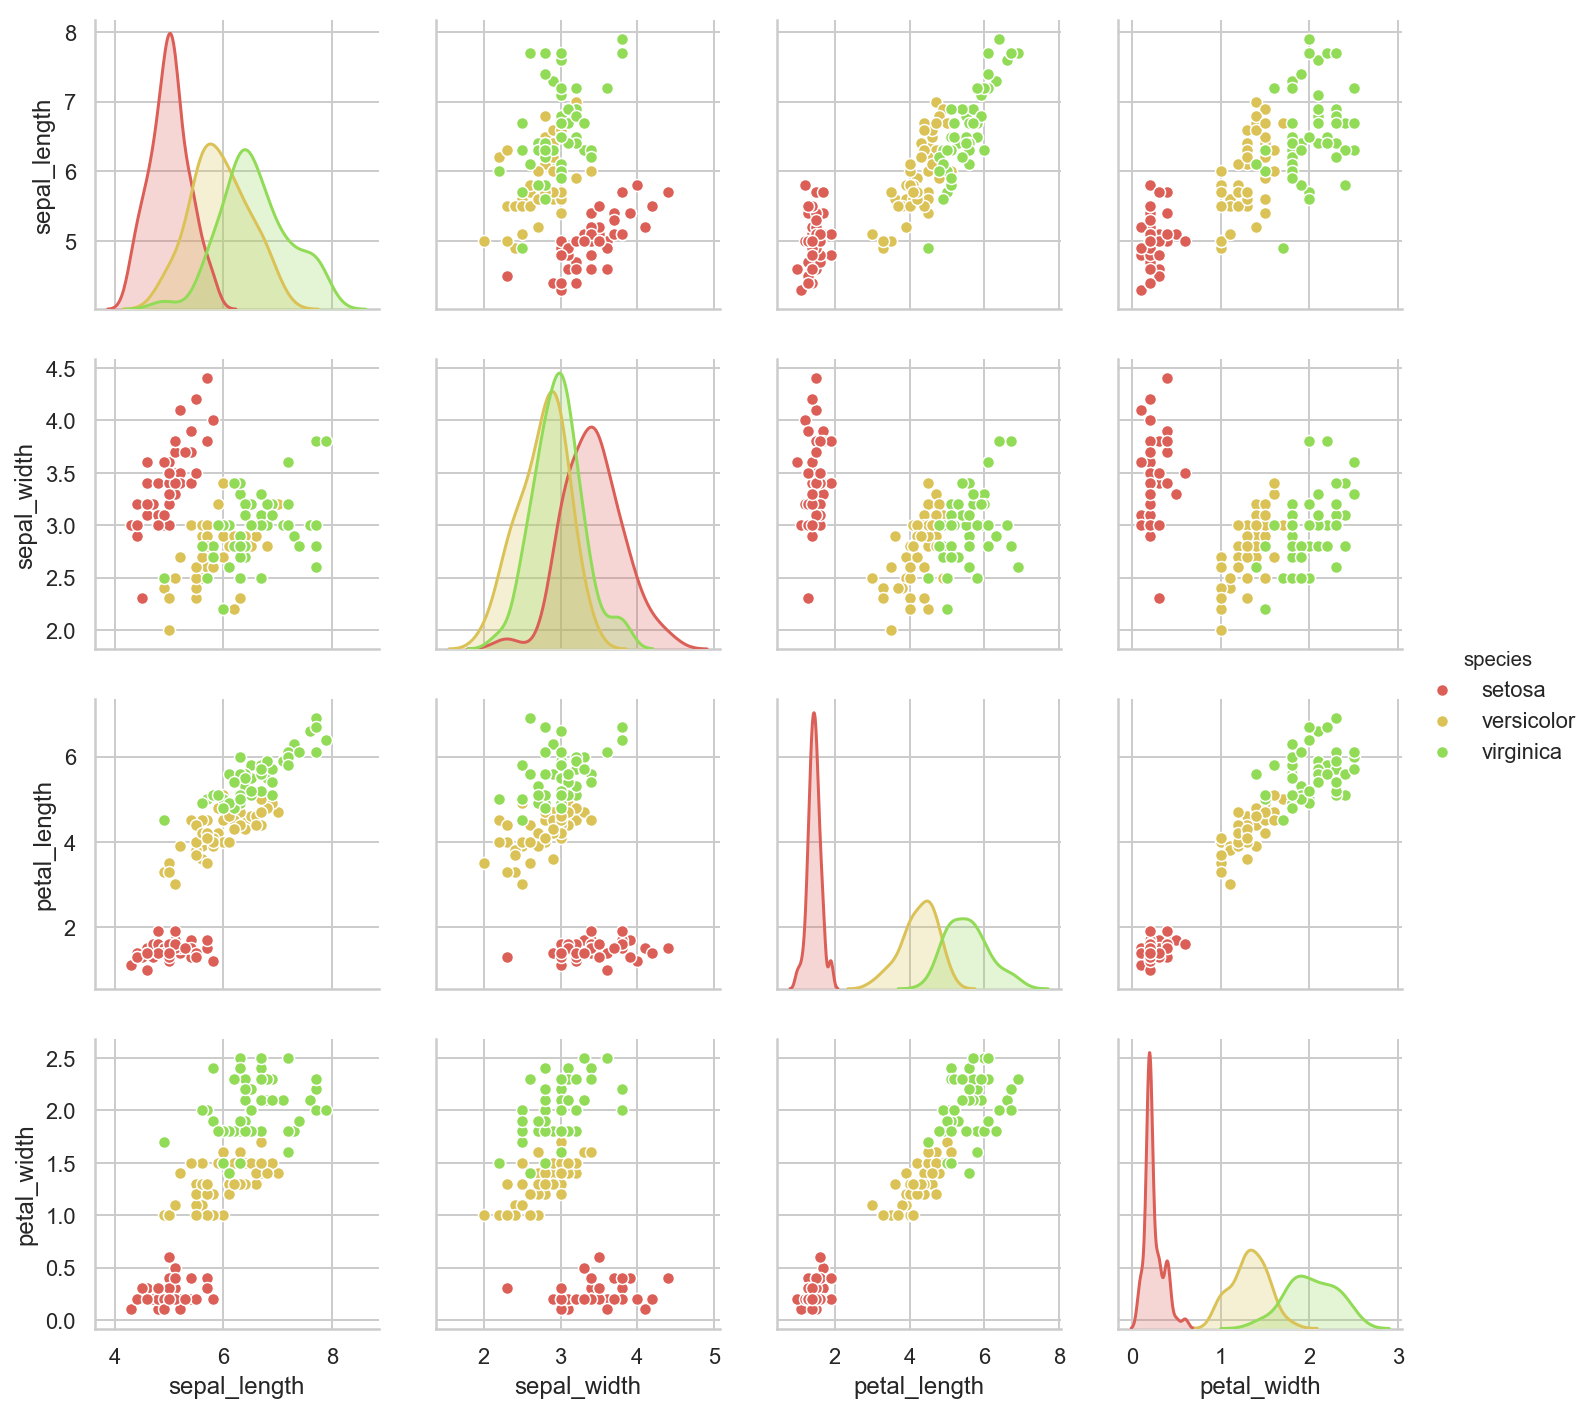

In [27]:
sns.pairplot(iris, hue="species")
plt.show()

##### lmplot
- https://seaborn.pydata.org/generated/seaborn.lmplot.html

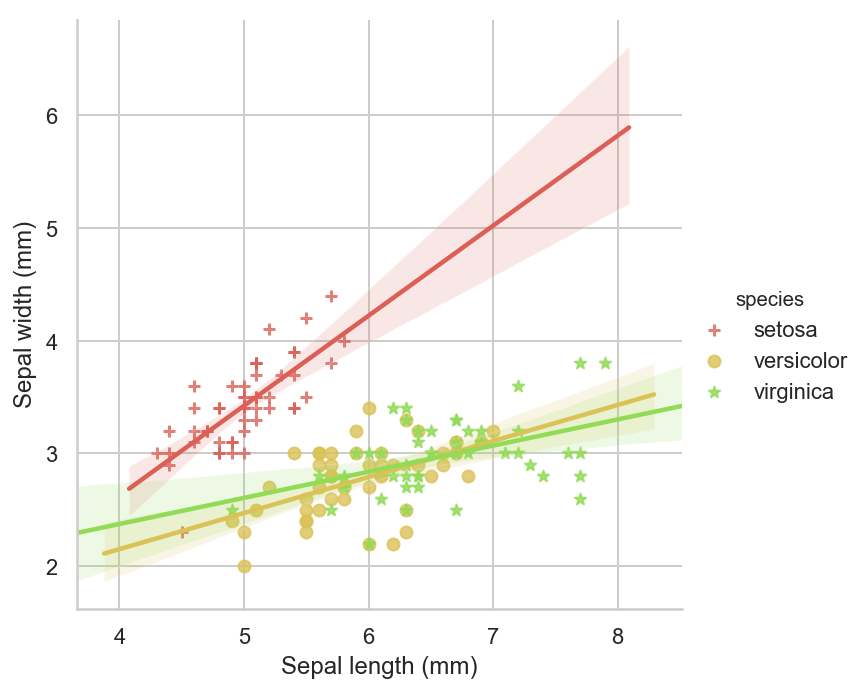

In [28]:
p = sns.lmplot(x="sepal_length", y="sepal_width", hue="species", data=iris, markers=["+", "o", "*"])
p.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

##### heatmap
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [29]:
tips = sns.load_dataset("tips")    # 팁 데이터
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [30]:
tips_sum = tips.pivot_table(index="time", columns="sex", values="tip", aggfunc=np.sum)
tips_sum

sex,Male,Female
time,,
Lunch,95.11,90.40
Dinner,389.96,156.11


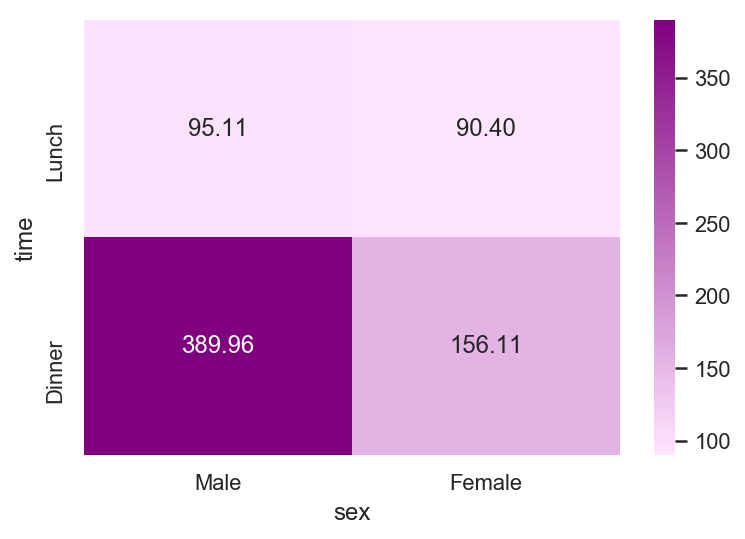

In [31]:
# annot : 수치 정보 출력, fmt : 수치데이터 포멧 ".2f" 소수 둘째 자리 , as_cmap: 스무스하게 표현
# light_palette : http://seaborn.pydata.org/generated/seaborn.light_palette.html
sns.heatmap(tips_sum, cmap=sns.light_palette("purple", as_cmap=True), annot=True, fmt=".2f")

In [32]:
tips_mean = tips.pivot_table(index="time", columns="sex", values="tip", aggfunc=np.mean)
tips_mean

sex,Male,Female
time,,
Lunch,2.882121,2.582857
Dinner,3.144839,3.002115


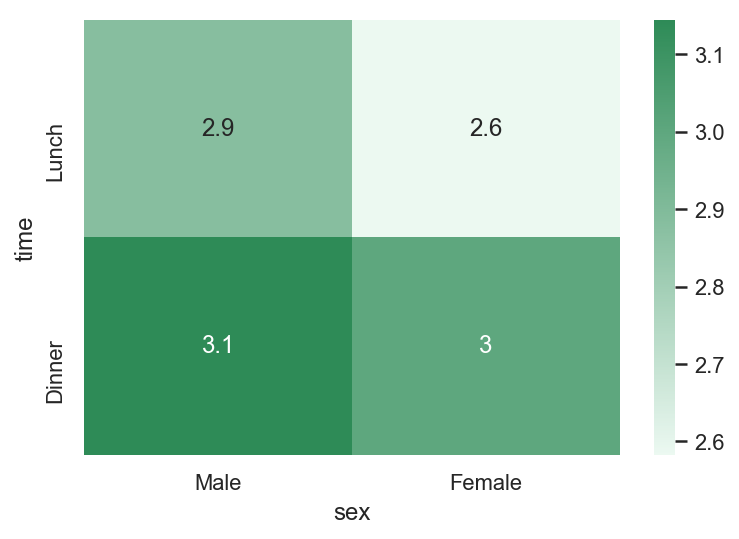

In [33]:
# fmt : ".2g" 소수 둘째 반올림, "d" 정수
sns.heatmap(tips_mean, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, fmt=".2g")

In [34]:
flights = sns.load_dataset("flights")
flights_data = flights.pivot("month", "year", "passengers")
flights_data

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


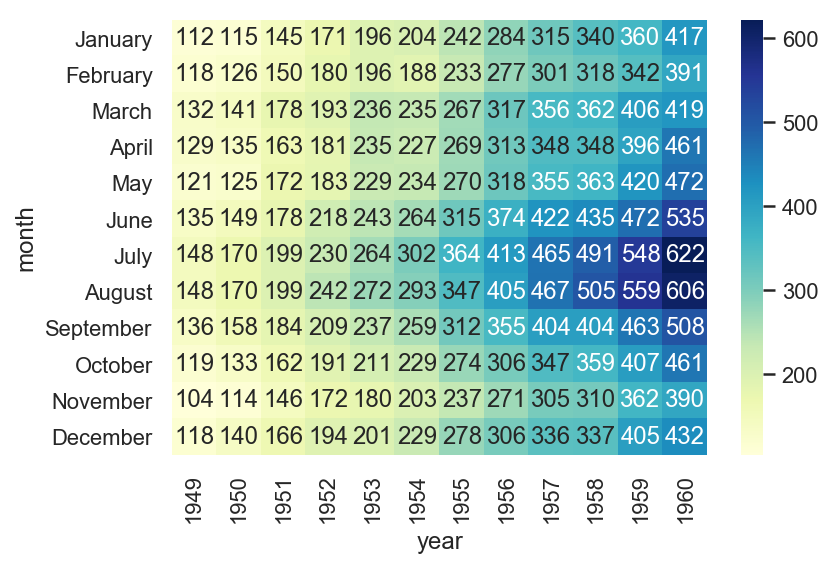

In [35]:
sns.heatmap(flights_data, cmap="YlGnBu", annot=True, fmt="d")